In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt 

import scipy as sp 
from scipy.optimize import curve_fit 


%matplotlib inline
%config InlineBackend.figure_format = 'png'

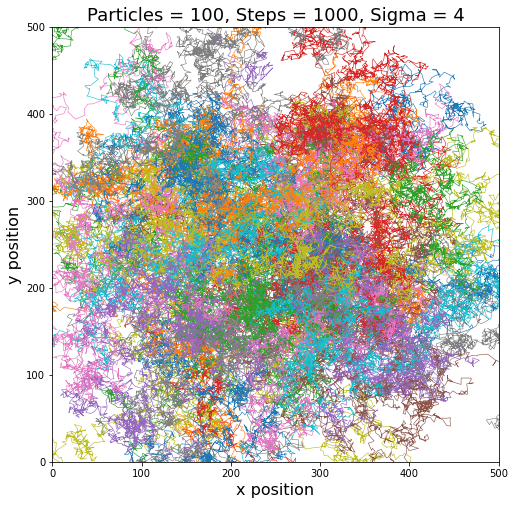

In [2]:
N = 100 #number of particles
steps = 1000 #number of steps
sigma = 4 #standard deviation of random step size

x0 = np.random.uniform(100,400,N) #randomized start points x.
y0 = np.random.uniform(100,400,N) #randomized start points y.

#Generates an array of N sub-arrays for x and y.
#Each sub-arrays is of length "steps."
#Elements are random step sizes drawn from a normal distribution.
#Parent distribution is of width "sigma" and is centered on zero.
xrand = np.random.normal(0,sigma,size=(N,steps))
yrand = np.random.normal(0,sigma,size=(N,steps))

#Generates a 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the cumulative displacement.
#Uses numpy cumulative sum (cumsum) function.
xdata = np.cumsum(xrand,axis=1)
ydata = np.cumsum(yrand,axis=1)

#Generates 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the squared displacments.
x_squared = xdata**2
y_squared = ydata**2

#Generates a 1D array of length "steps".
#Each element is the average of the N squared displacements for that step.
x_squared_avg = np.mean(x_squared,axis=0)
y_squared_avg = np.mean(y_squared,axis=0)

#Generates a 1D array of length "steps".
#Each element is the standard deviation of the mean
#of the N squared displacements for that step.
x_squared_sdom = np.std(x_squared,ddof=1,axis=0)/np.sqrt(N)
y_squared_sdom = np.std(y_squared,ddof=1,axis=0)/np.sqrt(N)

#Generates 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the cumulative displacements from
#each particle's randomly chosen starting point.
for n in np.arange(N):
    xdata[n] = x0[n] + xdata[n]
    ydata[n] = y0[n] + ydata[n]
    
#Plots the paths of all N particles in a 500 by 500 square.    
fig, ax = plt.subplots(1,1,figsize=(8,8))
for n in np.arange(N):
    ax.plot(xdata[n],ydata[n],'-',linewidth=0.6)
ax.set_xlim(0,500)
ax.set_ylim(0,500)
ax.set_xlabel('x position',fontsize=16)
ax.set_ylabel('y position',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
plt.show()

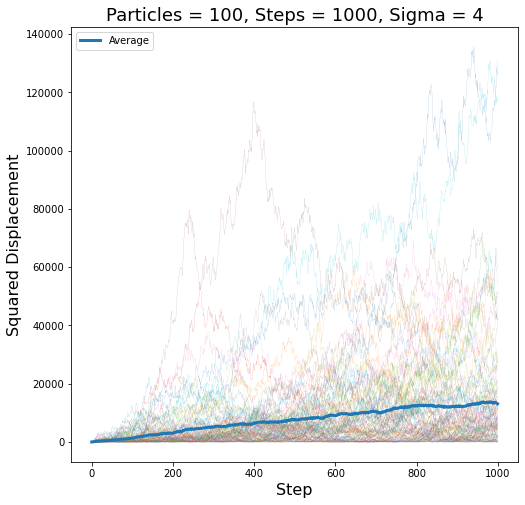

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
for n in np.arange(N):
    ax.plot(x_squared[n],'-',linewidth=0.1)
ax.plot(x_squared_avg,'-',linewidth=3, label='Average')
ax.set_xlabel('Step',fontsize=16)
ax.set_ylabel('Squared Displacement',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
ax.legend(labelcolor='black')
plt.show()

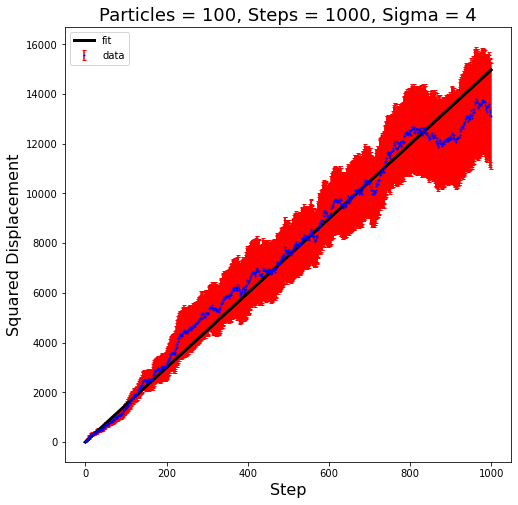

In [4]:
def line(x,a1):
    return a1*x

popt, pcov = curve_fit(line, np.arange(steps), x_squared_avg, sigma = x_squared_sdom)

xfit = np.linspace(0, steps, 10)
yfit = line(xfit,*popt)

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.errorbar(np.arange(steps),x_squared_avg,yerr=x_squared_sdom,xerr=None,linestyle='', marker='o', markersize=1, color='blue',ecolor='red',capsize=2,label='data')

ax.plot(xfit,yfit,'-',color='black',linewidth=3,label='fit')

ax.set_xlabel('Step',fontsize=16)
ax.set_ylabel('Squared Displacement',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
ax.legend(labelcolor='black')
plt.show()

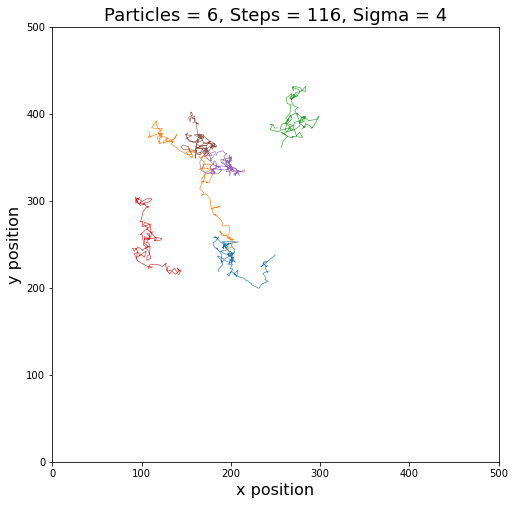

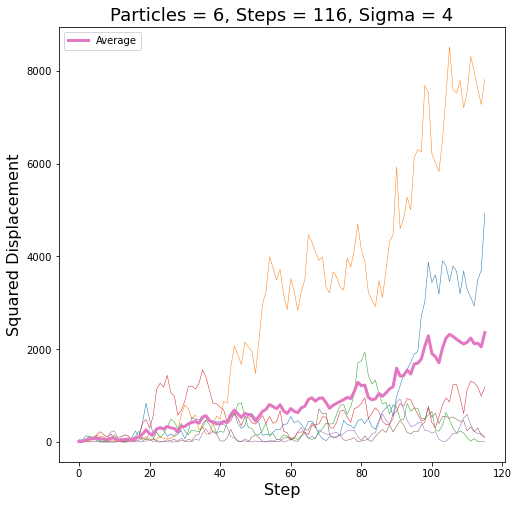

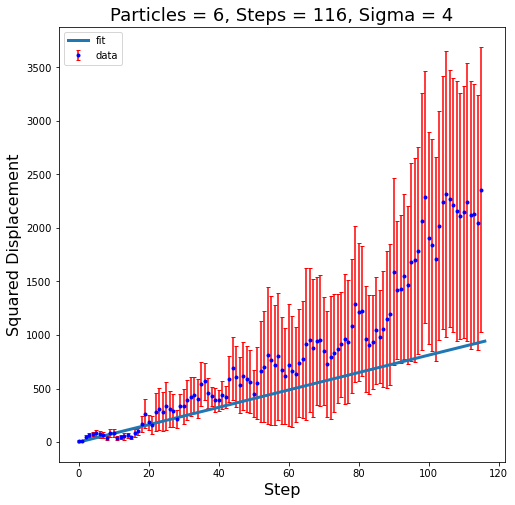

In [5]:
N = 6 #number of particles
steps = 116 #number of steps
sigma = 4 #standard deviation of random step size

x0 = np.random.uniform(100,400,N) #randomized start points x.
y0 = np.random.uniform(100,400,N) #randomized start points y.

#Generates an array of N sub-arrays for x and y.
#Each sub-arrays is of length "steps."
#Elements are random step sizes drawn from a normal distribution.
#Parent distribution is of width "sigma" and is centered on zero.
xrand = np.random.normal(0,sigma,size=(N,steps))
yrand = np.random.normal(0,sigma,size=(N,steps))

#Generates a 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the cumulative displacement.
#Uses numpy cumulative sum (cumsum) function.
xdata = np.cumsum(xrand,axis=1)
ydata = np.cumsum(yrand,axis=1)

#Generates 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the squared displacments.
x_squared = xdata**2
y_squared = ydata**2

#Generates a 1D array of length "steps".
#Each element is the average of the N squared displacements for that step.
x_squared_avg = np.mean(x_squared,axis=0)
y_squared_avg = np.mean(y_squared,axis=0)

#Generates a 1D array of length "steps".
#Each element is the standard deviation of the mean
#of the N squared displacements for that step.
x_squared_sdom = np.std(x_squared,ddof=1,axis=0)/np.sqrt(N)
y_squared_sdom = np.std(y_squared,ddof=1,axis=0)/np.sqrt(N)

#Generates 2D array of N sub-arrays for x and y.
#Each sub-array is of length "steps."
#Elements are the cumulative displacements from
#each particle's randomly chosen starting point.
for n in np.arange(N):
    xdata[n] = x0[n] + xdata[n]
    ydata[n] = y0[n] + ydata[n]
    
#Plots the paths of all N particles in a 500 by 500 square.    
fig, ax = plt.subplots(1,1,figsize=(8,8))
for n in np.arange(N):
    ax.plot(xdata[n],ydata[n],'-',linewidth=0.6)
ax.set_xlim(0,500)
ax.set_ylim(0,500)
ax.set_xlabel('x position',fontsize=16)
ax.set_ylabel('y position',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
plt.show()

#Plots the squared displacement vs. step
#for all N particles in a 500 by 500 square,
#as well as the mean squared displacement.
fig, ax = plt.subplots(1,1,figsize=(8,8))
for n in np.arange(N):
    ax.plot(x_squared[n],'-',linewidth=0.5)
ax.plot(x_squared_avg,'-',linewidth=3, label='Average')
ax.set_xlabel('Step',fontsize=16)
ax.set_ylabel('Squared Displacement',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
ax.legend(labelcolor='black')
plt.show()

#Defines the fit function.
def line(x,a1):
    return a1*x


#Performs the weighted least squared fit.
popt, pcov = curve_fit(line, np.arange(steps), x_squared_avg, sigma = x_squared_sdom)

#Generates points to plot for the best fit line.
xfit = np.linspace(0, steps, 10)
yfit = line(xfit,*popt)

#Plots the mean squared displacement, with uncertainties,
#and the best fit.
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.errorbar(np.arange(steps),x_squared_avg,yerr=x_squared_sdom,xerr=None,linestyle='', marker='o', markersize=3, color='blue',ecolor='red',capsize=2,label='data')

ax.plot(xfit,yfit,'-',color='tab:blue',linewidth=3,label='fit')

ax.set_xlabel('Step',fontsize=16)
ax.set_ylabel('Squared Displacement',fontsize=16)
title = 'Particles = ' + str(N) + ', Steps = ' + str(steps) + ', Sigma = ' + str(sigma)
ax.set_title(title,fontsize=18, color='black')
ax.legend(labelcolor='black')
plt.show()

In [22]:
x_squared_sdom

array([   7.76302186,    7.97590395,   19.94035977,   20.29121036,
         15.82335533,   26.07922891,   35.32858263,   27.40725497,
         18.78339582,   36.95733061,   38.9268089 ,   17.24858767,
         22.17626667,   31.60939208,   23.21780332,   14.27019364,
         35.66574314,   32.2591602 ,   76.23726204,  134.67748919,
         72.11528473,   83.06923711,  175.41612217,  198.1820279 ,
        184.83940279,  224.43787872,  168.59216633,  153.57091302,
         86.47755245,  107.90341791,  164.20714562,  190.52680391,
        181.43846995,  161.74524395,  181.28057736,  205.98209901,
        177.12362562,  140.55150585,   90.51757881,  108.00290211,
        100.76280002,  126.97530375,  100.69804339,  214.50459583,
        295.25434869,  283.7814916 ,  259.88571159,  320.20648172,
        308.68114184,  292.60973316,  216.37470594,  335.76731892,
        467.99329295,  514.62831977,  641.35654209,  600.61883931,
        557.64595279,  593.25352851,  502.21498708,  450.42282